In [8]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
from time import sleep
import matplotlib.pyplot as plt
import warnings

#그래프 한글 오류 해결
from matplotlib import font_manager, rc

warnings.filterwarnings("ignore")
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [57]:
df = pd.read_excel('excel/시도별_전출입_인구수.xlsx')
df = df.drop(0)
df['전출지별'] = df['전출지별'].ffill()
#NaN(Not a Number, 결측지) : 측정되지 않은 데이터

df = df.rename({'전출지별':'전출지','전입지별':'전입지'}, axis = 1)
df

,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,7629098,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155,6128738
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,1573594,1589431,1515602,1472937,1439707,1426493,1578127,1418187,1201527,1206963
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,485710,507031,459015,439073,416095,411704,491829,441323,383848,364271
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,350213,351424,328228,321182,321158,312419,347248,304761,265354,296291
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,452297,473223,441646,409465,433639,420014,444556,433137,395140,424127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전북특별자치도,139,202,141,210,219,415,392,408,...,609,683,733,768,902,1032,1007,986,878,975
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,928,1062,1127,1102,1254,1302,1466,1326,1194,1109
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,728,903,931,994,1146,1229,1181,1261,1177,1161
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1223,1500,1448,1501,1780,1825,1861,1947,1798,1783


In [50]:
#(수작업)인덱싱으로 처리
df2 = df.iloc[18:35]
df2 = df2.drop(20, axis = 'index')
df2 = df2.drop('전출지', axis = 1)
df2 = df2.set_index('전입지')


1      False
2      False
3      False
4      False
5      False
       ...  
320    False
321    False
322    False
323    False
324    False
Name: 전출지, Length: 324, dtype: bool

In [59]:
mask = ((df['전출지'] == '서울특별시') & (df['전입지'] != '서울특별시')).values  #무엇을 뽑기위해
df3 = df[mask]
df3 = df3.drop('전출지', axis = 'columns')
df3 = df3.set_index('전입지')
df3.head(3)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,1661425,1726687,1655859,1571423,1549937,1476081,1642977,1524430,1236867,1238213
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17320,17009,15062,14484,13093,12805,13209,13078,11532,11748
대구광역시,-,-,-,-,-,-,-,-,-,-,...,10062,10191,9623,8891,8446,7897,8792,8350,7716,8289


1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: int64


Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

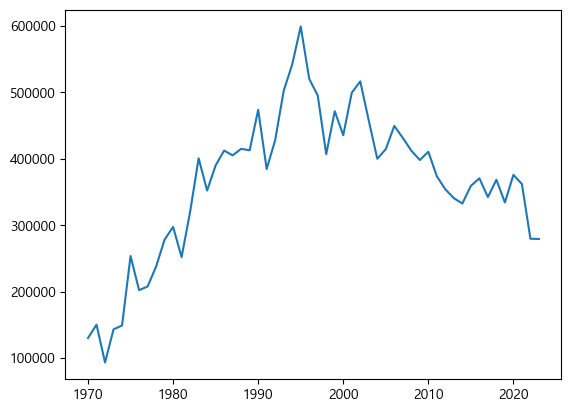

In [78]:
# 서울특별시에서 전출하여 '경기도'로 전입한 정보만 추출 type(Series)
sr1 = df3.loc['경기도']
sr1 = sr1.map(int)
print(sr1[:5])

#맷플롯립의 plt.그래프형태() 사용가능
#plt.그래프형태(시리즈)
#plt.그래프형태(x축, 데이터 y축)


year = sr1.index
data = sr1.values
year = year.map(int)

plt.plot(year,data)

year



Text(0.5, 1.0, '서울시 → 경기도 인구 이동')

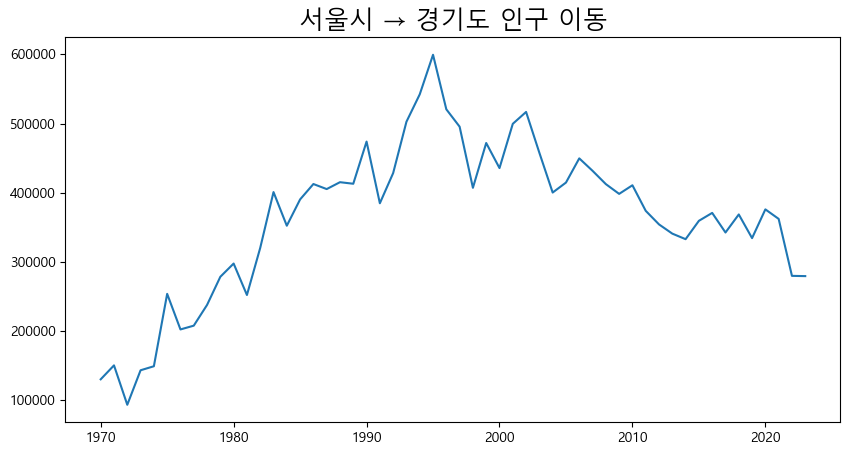

In [83]:
sr1.index = year
plt.figure(figsize = (10,5))
plt.plot(sr1)
plt.title('서울시 → 경기도 인구 이동', size = 18)

### 1.모형의 크기 정하기
    plt.figure(figsize = (행 크기,열 크기))
    
### 2. 그래프 그리기
    plt.plot(시리즈o)
    plt.bar(시리즈o)
    plt.scatter(시리즈x)
    plt.pie()

### 3. 그래프 꾸미기
    plt.title('제목')
    plt.xlabel('x축 제목')
    plt.ylabel('y축 제목')
    plt.legend(범례)
    plt.xticks(rotation = 'vertical')
    
### 4. 그래프 출력 및 저장
    plt.show()
    plt.savefig()

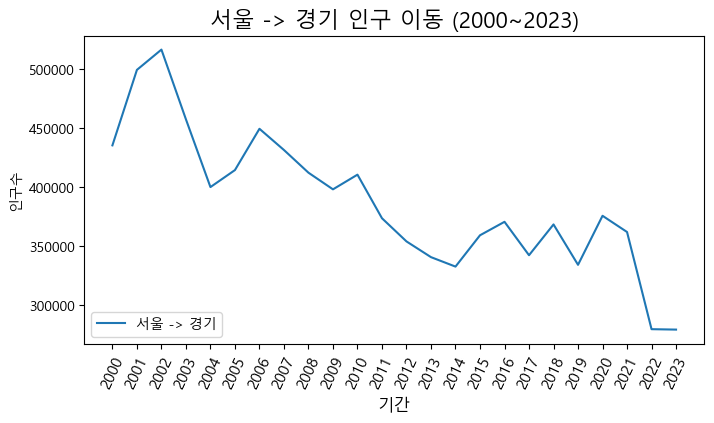

In [120]:
sr2 = df3.loc['경기도']
sr2 = sr2.map(int)


# 2000 ~ 2023 사이에 서울 -> 경기 인구 이동
sr2 = sr2['2000':]

plt.figure(figsize =(8,4))

plt.plot(sr2, label = '서울 -> 경기')

plt.title('서울 -> 경기 인구 이동 (2000~2023)', size = 16)
plt.xticks(rotation = 65, size =11)
plt.xlabel('기간', size = 12)
plt.ylabel('인구수')
plt.legend(loc ='lower left')

plt.show()

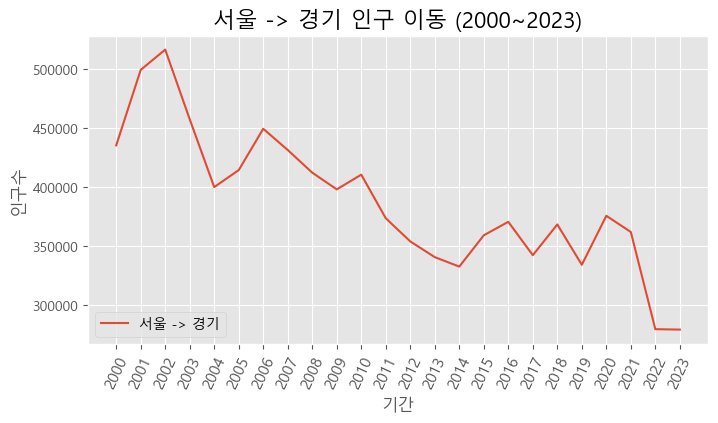

In [124]:
plt.style.use('fast')  #배경

plt.figure(figsize =(8,4))

plt.plot(sr2, label = '서울 -> 경기')

plt.title('서울 -> 경기 인구 이동 (2000~2023)', size = 16)
plt.xticks(rotation = 65, size =11)
plt.xlabel('기간', size = 12)
plt.ylabel('인구수')
plt.legend(loc ='lower left')

plt.show()

"plt.title('서울 -> 경기 인구 이동 (2000~2023)', size = 16)\nplt.xticks(rotation = 65, size =11)\nplt.xlabel('기간', size = 12)\nplt.ylabel('인구수')\nplt.legend(loc ='lower left')\n\nplt.show()"

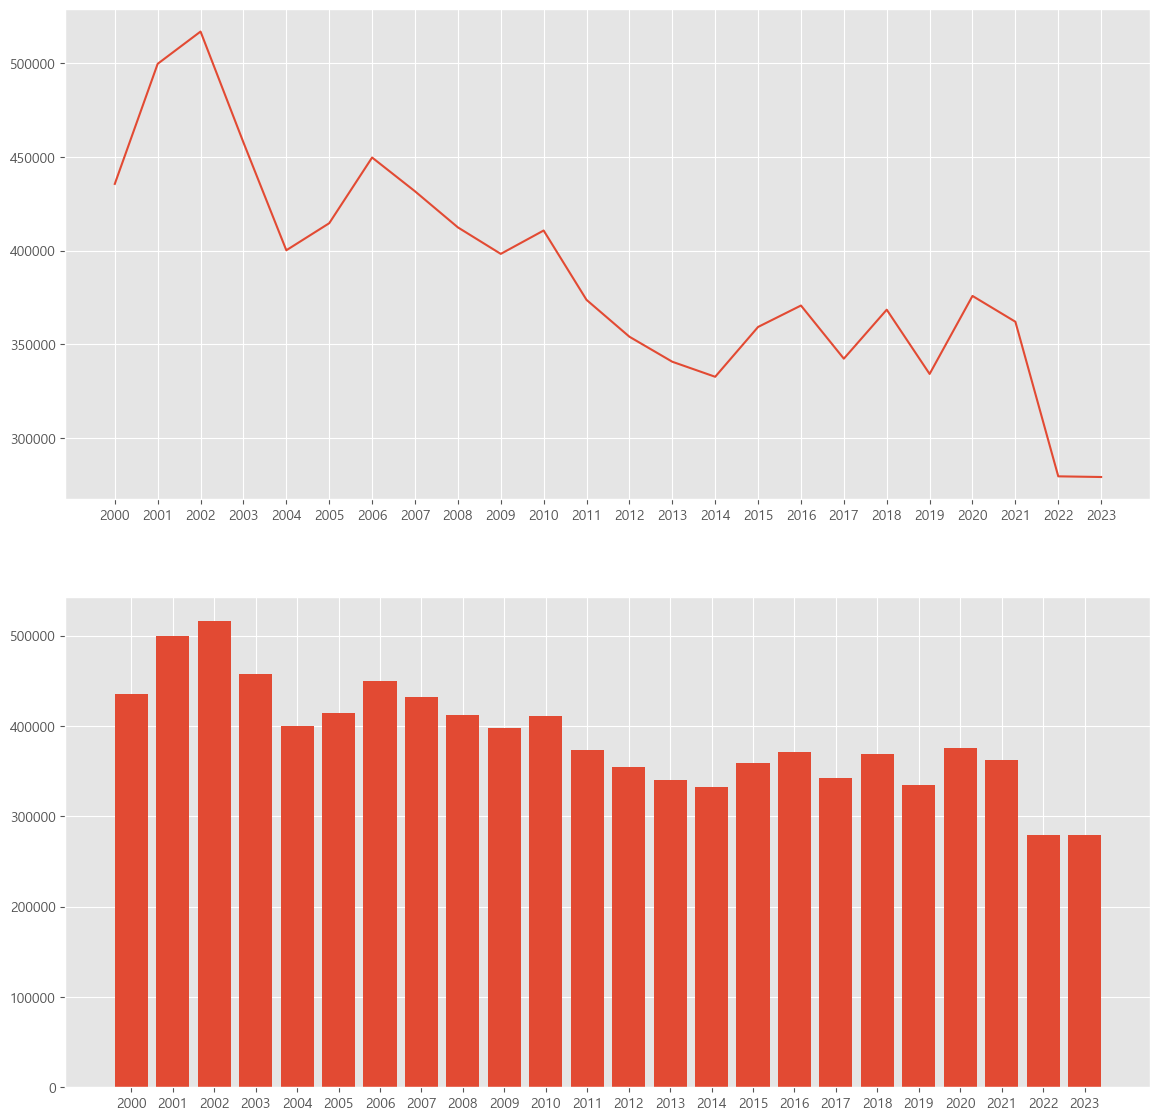

In [131]:
figure = plt.figure(figsize =(14,14))

#서브 플롯 생성 (다수의 그래프표)
ax1 = figure.add_subplot(2,1,1)
ax2 = figure.add_subplot(2,1,2)

#
ax1.plot(sr2)
ax2.bar(x = sr2.index, height = sr2.values)

"""plt.title('서울 -> 경기 인구 이동 (2000~2023)', size = 16)
plt.xticks(rotation = 65, size =11)
plt.xlabel('기간', size = 12)
plt.ylabel('인구수')
plt.legend(loc ='lower left')

plt.show()"""

figure = plt.figure(figsize =(8,4))

# 서브 플롯 생성 (다수의 그래프표)
figure.add_subplot(행수,열수,위치)
ax1 = figure.add_subplot(2,3,1)
ax2 = figure.add_subplot(2,3,2)
ax3 = figure.add_subplot(2,3,3)

# 그래프 그리기
ax1.plot()
ax2.plot()
ax3.plot()

# 꾸미기
ax.set_메소드()

# 꾸

Text(0.5, 1.0, '제목2')

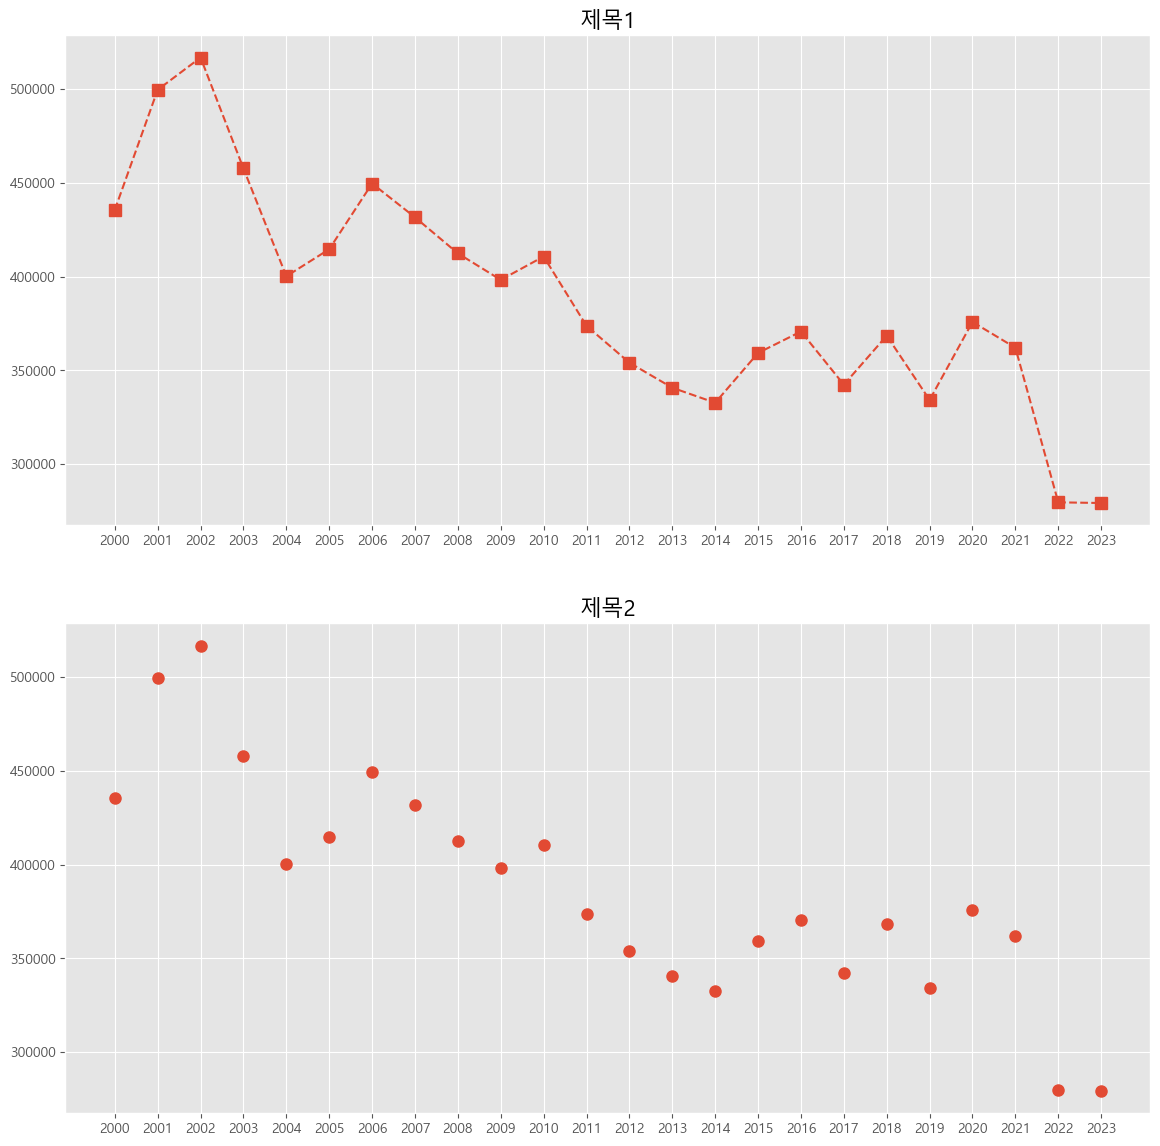

In [141]:
figure = plt.figure(figsize =(14,14))

ax1 = figure.add_subplot(2,1,1)
ax2 = figure.add_subplot(2,1,2)

ax1.plot(sr2, ls = '--', marker = 's',markersize=8)
ax2.plot(sr2, 'o',markersize=8)
ax1.set_title('제목1', size = 16)
ax2.set_title('제목2',size = 16)